# 가위바위보 expo 


In [102]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
print(tf.__version__)
print(np.__version__)

2.6.0
1.21.4


In [103]:
# 224*224 -> 28*28 reshape

In [104]:
from PIL import Image,ImageOps
import glob
import os

print("PIL 라이브러리 import 완료!")

PIL 라이브러리 import 완료!


In [105]:
def resize_images(img_path):
	images=glob.glob(img_path + "/*.jpg")  
    
	print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
	target_size=(28,28)
	for img in images:
		old_img=Image.open(img)
		new_img=old_img.resize(target_size,Image.ANTIALIAS)
		new_img.save(img, "JPEG")
    
	print(len(images), " images resized.")
	
# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/scissor"
resize_images(image_dir_path)

print("가위 이미지 resize 완료!")

230  images to be resized.
230  images resized.
가위 이미지 resize 완료!


In [106]:
# 바위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/rock"
resize_images(image_dir_path)

print("바위 이미지 resize 완료!")

230  images to be resized.
230  images resized.
바위 이미지 resize 완료!


In [107]:
# 보 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/paper"
resize_images(image_dir_path)

print("보 이미지 resize 완료!")

230  images to be resized.
230  images resized.
보 이미지 resize 완료!


In [108]:
import numpy as np

def load_data(img_path, number_of_data=690):  # 가위바위보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_train)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper"
(x_train, y_train)=load_data(image_dir_path)
x_train_norm = x_train/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

학습데이터(x_train)의 이미지 개수는 690 입니다.
x_train shape: (690, 28, 28, 3)
y_train shape: (690,)


라벨:  0


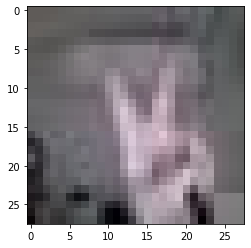

In [109]:
plt.imshow(x_train[15])
print('라벨: ', y_train[15])

In [110]:
x_train_reshaped=x_train_norm.reshape( -1, 28, 28, 3)


In [111]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
from tensorflow.keras.layers import Dropout, Dense

In [112]:
# 바꿔 볼 수 있는 하이퍼파라미터들
n_channel_1=64
n_channel_2=128
n_dense=64
n_train_epoch=30

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))



model.add(keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(Dropout(0.2))


model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(n_dense, activation='relu'))
model.add(Dropout(0.2)) # 드롭아웃 추가. 비율은 50%


model.add(keras.layers.Dense(3, activation='softmax'))

model.summary()



Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 26, 26, 16)        448       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 11, 11, 32)        4640      
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 5, 5, 32)          0         
_________________________________________________________________
dropout_14 (Dropout)         (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 800)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 64)               

In [113]:



model.compile(optimizer="adam", loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# 모델 훈련
model.fit(x_train_reshaped, y_train, epochs=n_train_epoch)



Epoch 1/30
22/22 [==============================] - 0s 3ms/step - loss: 1.0777 - accuracy: 0.4246
Epoch 2/30
22/22 [==============================] - 0s 3ms/step - loss: 0.9860 - accuracy: 0.5333
Epoch 3/30
22/22 [==============================] - 0s 3ms/step - loss: 0.8371 - accuracy: 0.6087
Epoch 4/30
22/22 [==============================] - 0s 3ms/step - loss: 0.7066 - accuracy: 0.7072
Epoch 5/30
22/22 [==============================] - 0s 3ms/step - loss: 0.5867 - accuracy: 0.7739
Epoch 6/30
22/22 [==============================] - 0s 3ms/step - loss: 0.5182 - accuracy: 0.8159
Epoch 7/30
22/22 [==============================] - 0s 3ms/step - loss: 0.4589 - accuracy: 0.8145
Epoch 8/30
22/22 [==============================] - 0s 3ms/step - loss: 0.3755 - accuracy: 0.8696
Epoch 9/30
22/22 [==============================] - 0s 3ms/step - loss: 0.2985 - accuracy: 0.8942
Epoch 10/30
22/22 [==============================] - 0s 3ms/step - loss: 0.2507 - accuracy: 0.9145
Epoch 11/30
22/22 [

In [114]:
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test/rock_scissor_paper/scissor"
resize_images(image_dir_path)

print("가위 이미지 resize 완료!")

100  images to be resized.
100  images resized.
가위 이미지 resize 완료!


In [115]:
# 바위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test/rock_scissor_paper/rock"
resize_images(image_dir_path)

print("바위 이미지 resize 완료!")

100  images to be resized.
100  images resized.
바위 이미지 resize 완료!


In [116]:
# 보 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test/rock_scissor_paper/paper"
resize_images(image_dir_path)

print("보 이미지 resize 완료!")

100  images to be resized.
100  images resized.
보 이미지 resize 완료!


In [117]:

def load_data_test(img_path, number_of_data=300):  # 가위바위보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_train)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test/rock_scissor_paper"
(x_test, y_test)=load_data(image_dir_path)
x_test_norm = x_test/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_test shape: {}".format(x_test.shape))
print("y_test shape: {}".format(y_test.shape))

학습데이터(x_train)의 이미지 개수는 300 입니다.
x_test shape: (690, 28, 28, 3)
y_test shape: (690,)


In [118]:
x_test_reshaped=x_test_norm.reshape( -1, 28, 28, 3)

In [119]:
# 모델 시험
test_loss, test_accuracy = model.evaluate(x_test_reshaped, y_test, verbose=2)
print(f"test_loss: {test_loss} ")
print(f"test_accuracy: {test_accuracy}")

22/22 - 0s - loss: 3.6873 - accuracy: 0.7855
test_loss: 3.6873185634613037 
test_accuracy: 0.7855072617530823


In [120]:
predicted_result = model.predict(x_test_reshaped)
predicted_labels = np.argmax(predicted_result, axis=1)

[135, 267, 256, 215, 220, 247, 249, 144, 281, 103, 146, 288, 259, 227, 175, 109, 253, 157, 290, 181, 246, 261, 222, 246, 247, 239, 207, 104, 126, 292, 217, 288, 204, 290, 245, 257, 175, 259, 247, 242, 273, 266, 136, 291, 247, 166, 109, 254, 192, 180]
예측확률분포 : [9.9952817e-01 4.7166951e-04 1.3165545e-07]
라벨 : 1, 예측결과: 0


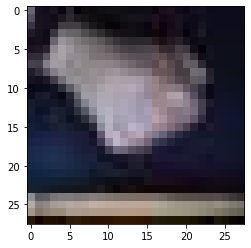

예측확률분포 : [1.1505466e-04 9.9988496e-01 3.7706868e-10]
라벨 : 2, 예측결과: 1


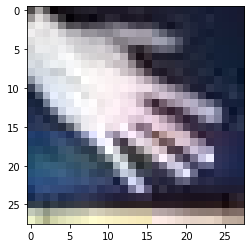

예측확률분포 : [9.9999547e-01 4.4841900e-06 2.1875713e-12]
라벨 : 2, 예측결과: 0


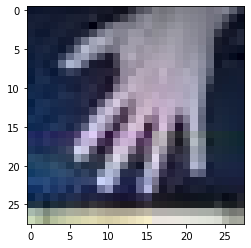

예측확률분포 : [5.2804101e-01 4.7195902e-01 4.1221946e-09]
라벨 : 2, 예측결과: 0


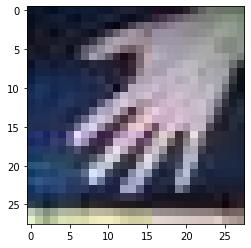

예측확률분포 : [1.000000e+00 4.599775e-10 3.023988e-12]
라벨 : 2, 예측결과: 0


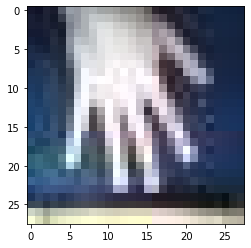

예측확률분포 : [1.0000000e+00 7.6083835e-12 2.4808728e-13]
라벨 : 2, 예측결과: 0


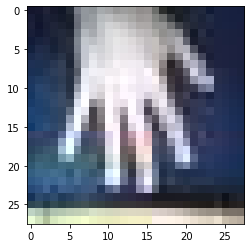

예측확률분포 : [1.0000000e+00 3.5466320e-12 1.2019013e-11]
라벨 : 2, 예측결과: 0


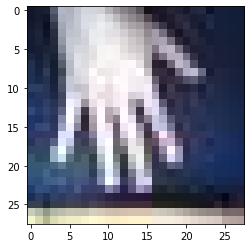

예측확률분포 : [9.9997497e-01 1.1987686e-08 2.5023917e-05]
라벨 : 1, 예측결과: 0


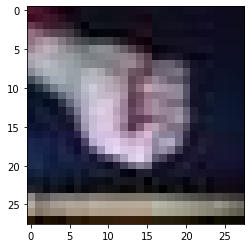

예측확률분포 : [3.9207636e-05 9.9996078e-01 2.2978428e-08]
라벨 : 2, 예측결과: 1


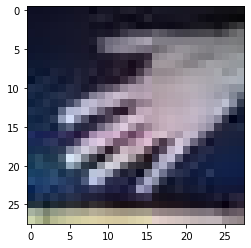

예측확률분포 : [9.9999666e-01 3.3839608e-06 1.2341761e-08]
라벨 : 1, 예측결과: 0


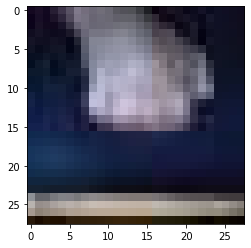

예측확률분포 : [9.9999523e-01 4.7469371e-06 1.1488179e-08]
라벨 : 1, 예측결과: 0


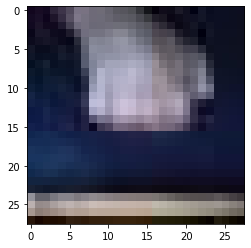

예측확률분포 : [1.0000000e+00 4.1230121e-15 4.1764725e-21]
라벨 : 2, 예측결과: 0


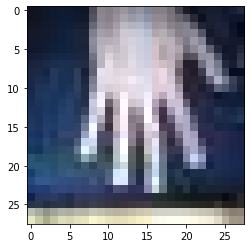

예측확률분포 : [6.0726303e-01 3.9273697e-01 1.2009218e-08]
라벨 : 2, 예측결과: 0


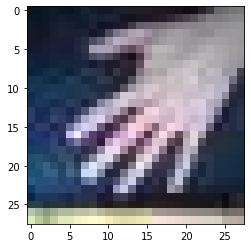

예측확률분포 : [4.4051387e-08 9.9984276e-01 1.5718637e-04]
라벨 : 2, 예측결과: 1


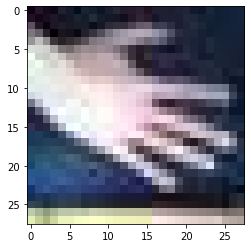

예측확률분포 : [7.444434e-01 2.555493e-01 7.246392e-06]
라벨 : 1, 예측결과: 0


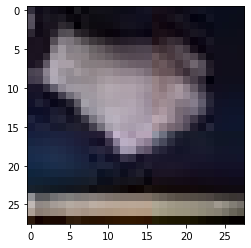

예측확률분포 : [9.9480540e-01 5.1908335e-03 3.7827369e-06]
라벨 : 1, 예측결과: 0


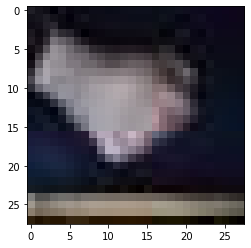

예측확률분포 : [9.9998581e-01 1.4138544e-05 1.2321959e-09]
라벨 : 2, 예측결과: 0


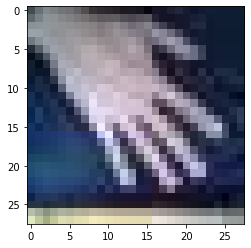

예측확률분포 : [7.3890853e-01 2.6109150e-01 2.9865913e-10]
라벨 : 1, 예측결과: 0


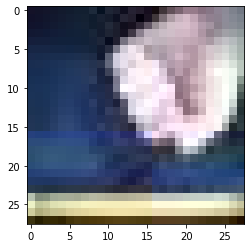

예측확률분포 : [1.4404891e-04 9.9910331e-01 7.5276289e-04]
라벨 : 2, 예측결과: 1


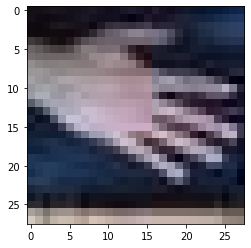

예측확률분포 : [7.7649707e-01 2.2350289e-01 3.3812042e-09]
라벨 : 1, 예측결과: 0


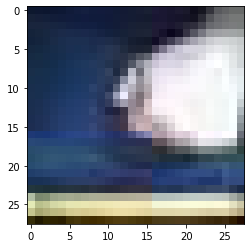

예측확률분포 : [1.0000000e+00 1.0272616e-09 8.1957753e-11]
라벨 : 2, 예측결과: 0


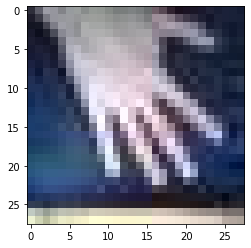

예측확률분포 : [9.6642715e-01 3.3572804e-02 2.0642484e-10]
라벨 : 2, 예측결과: 0


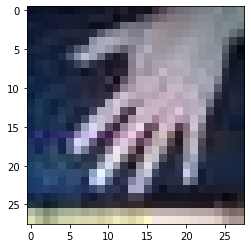

예측확률분포 : [2.6761569e-04 9.9973232e-01 1.6366851e-08]
라벨 : 2, 예측결과: 1


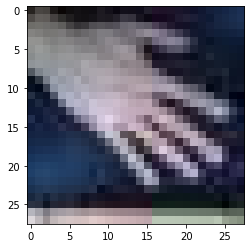

예측확률분포 : [1.0000000e+00 1.0272616e-09 8.1957753e-11]
라벨 : 2, 예측결과: 0


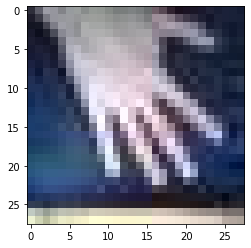

예측확률분포 : [1.0000000e+00 7.6083835e-12 2.4808728e-13]
라벨 : 2, 예측결과: 0


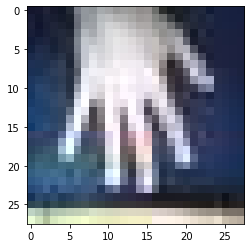

예측확률분포 : [1.0000000e+00 6.6662413e-12 1.7280892e-11]
라벨 : 2, 예측결과: 0


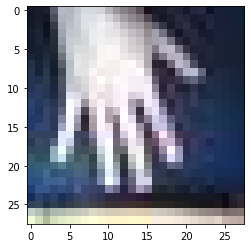

예측확률분포 : [9.9750793e-01 2.4912939e-03 6.5502627e-07]
라벨 : 2, 예측결과: 0


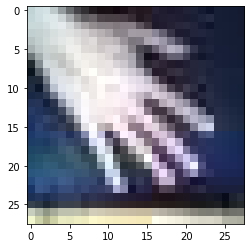

예측확률분포 : [9.9999964e-01 2.3411071e-07 1.7122159e-07]
라벨 : 1, 예측결과: 0


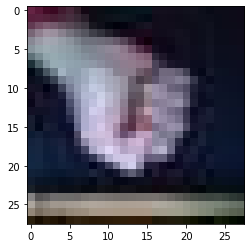

예측확률분포 : [9.9999166e-01 8.3458872e-06 2.1942535e-08]
라벨 : 1, 예측결과: 0


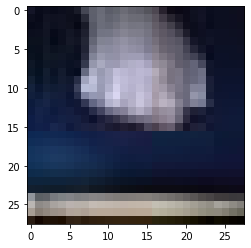

예측확률분포 : [1.0000000e+00 1.0756517e-09 1.3462170e-15]
라벨 : 2, 예측결과: 0


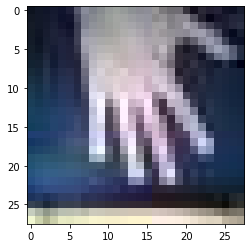

예측확률분포 : [1.4490781e-08 1.0000000e+00 4.3688564e-10]
라벨 : 2, 예측결과: 1


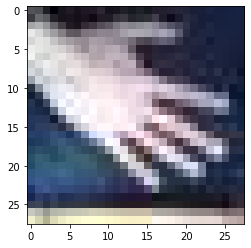

예측확률분포 : [1.0000000e+00 4.1230121e-15 4.1764725e-21]
라벨 : 2, 예측결과: 0


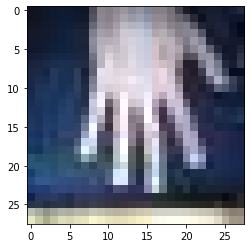

예측확률분포 : [1.15048096e-01 8.84951949e-01 4.24034958e-08]
라벨 : 2, 예측결과: 1


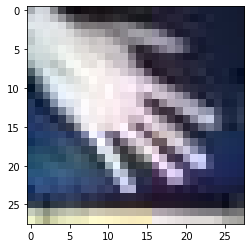

예측확률분포 : [1.4404891e-04 9.9910331e-01 7.5276289e-04]
라벨 : 2, 예측결과: 1


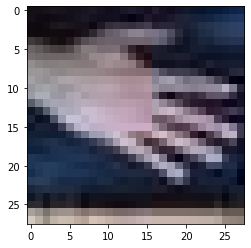

예측확률분포 : [4.1136886e-06 9.9999559e-01 2.3293835e-07]
라벨 : 2, 예측결과: 1


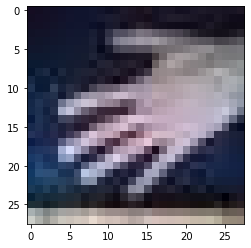

예측확률분포 : [6.1088634e-01 3.8911369e-01 2.6341327e-09]
라벨 : 2, 예측결과: 0


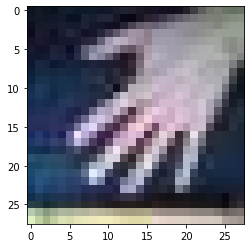

예측확률분포 : [7.444434e-01 2.555493e-01 7.246392e-06]
라벨 : 1, 예측결과: 0


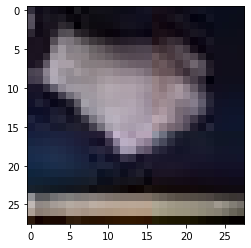

예측확률분포 : [6.0726303e-01 3.9273697e-01 1.2009218e-08]
라벨 : 2, 예측결과: 0


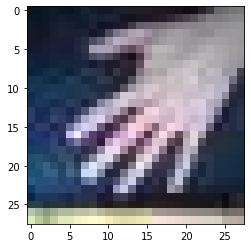

예측확률분포 : [1.0000000e+00 7.6083835e-12 2.4808728e-13]
라벨 : 2, 예측결과: 0


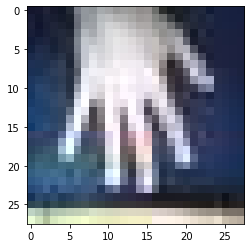

예측확률분포 : [3.8581165e-06 9.9996531e-01 3.0882791e-05]
라벨 : 2, 예측결과: 1


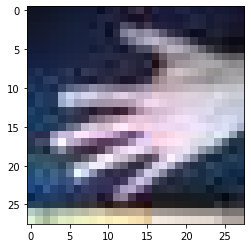

예측확률분포 : [9.9568021e-01 4.3036197e-03 1.6150520e-05]
라벨 : 2, 예측결과: 0


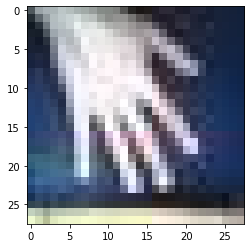

예측확률분포 : [9.9998152e-01 1.8474771e-05 3.3148589e-10]
라벨 : 2, 예측결과: 0


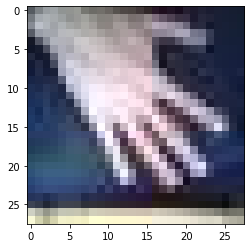

예측확률분포 : [9.9991262e-01 8.6145657e-05 1.2067069e-06]
라벨 : 1, 예측결과: 0


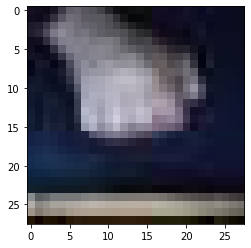

예측확률분포 : [9.9999917e-01 8.7084982e-07 1.3806862e-09]
라벨 : 2, 예측결과: 0


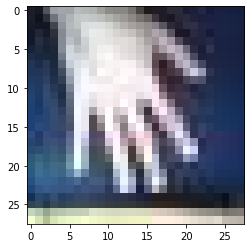

예측확률분포 : [1.0000000e+00 7.6083835e-12 2.4808728e-13]
라벨 : 2, 예측결과: 0


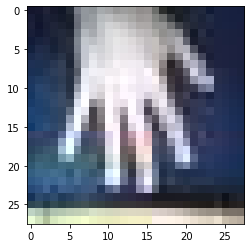

예측확률분포 : [9.9957258e-01 4.2719438e-04 1.8087881e-07]
라벨 : 1, 예측결과: 0


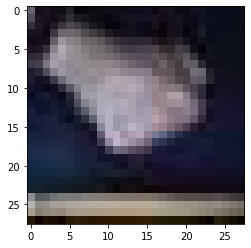

예측확률분포 : [9.9480540e-01 5.1908335e-03 3.7827369e-06]
라벨 : 1, 예측결과: 0


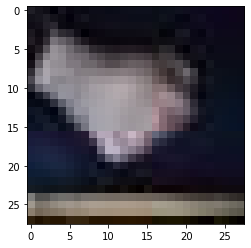

예측확률분포 : [1.0000000e+00 7.6083835e-12 2.4808728e-13]
라벨 : 2, 예측결과: 0


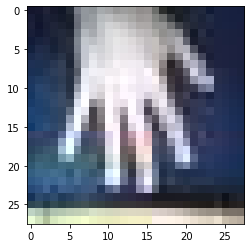

예측확률분포 : [9.999045e-01 9.551333e-05 5.651343e-08]
라벨 : 1, 예측결과: 0


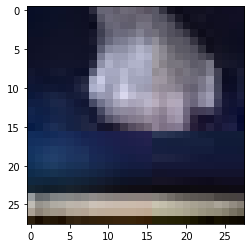

예측확률분포 : [7.8559989e-01 2.1440014e-01 3.1949693e-08]
라벨 : 1, 예측결과: 0


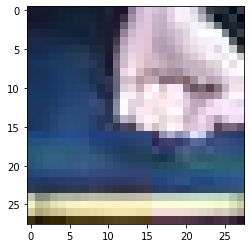

In [121]:
import random
wrong_predict_list=[]
for i, _ in enumerate(predicted_labels):
#i번째 test_labels와 y_test가 다른 경우만 모아보자
    if predicted_labels[i] != y_test[i]:
        
        wrong_predict_list.append(i)

        
#wrong_predict_list에서 랜덤 5개만 뽑아보자
samples = random.choices(population = wrong_predict_list, k=50)
print(samples) #index값을 저장해놓은 wrong_predict_list에서 랜덤 5개 뽑앗으므로 결국 index값만 각 결과, 라벨에 넣어주면 나온다.

for n in samples:
    print("예측확률분포 : " + str(predicted_result[n]))
    print("라벨 : "+ str(y_test[n]) + ", 예측결과: " + str(predicted_labels[n]))
    plt.imshow(x_test[n], cmap=plt.cm.binary)
    plt.show()

#0 가위, 1 바위 2 보

# 회고 

실수로 사진 찍다가 230개를 사용해 버려서 그냥 230개로 맞추기로 했다 
train data에 대한 정확도는 높게 나왔다 나는 230개 총 690개의 데이터를 사용했기 때문에 다른 그루분들의 데이터를 test로 사용할때
230개로 맞춰야 했다 그래서 2명의 그루분꺼와 한명의 그루분꺼 30개를 가지고 230개를 맞추었고 
test로 돌린 결과 좋지 40%를 넘지 못했다 처음에는 오버피팅 문제인가 해서 drop율도 높혀서 오버피팅을 방지 해주었지만 
여전히 좋지 않은 결과밖에 나오지 않았다 이유는 무엇인지 지금은 모르겠지만 추후에 업로드 해서 성능을 높히는 방향으로 가야 할것같다 




